In [1]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis --unzip

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 70.4MB/s]


In [2]:
import pandas as pd
training_data = pd.read_csv("twitter_training.csv")

In [3]:
# what is the data liek ?
training_data
# splitting into valadation data
validation_data=pd.read_csv("twitter_validation.csv")
validation_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:

#lets chnage the colum names
training_data.columns=['SerialNo','Company','labels','text']
validation_data.columns=['SerialNo','Company','labels','text']

In [5]:
#lets see how many null vals are there
print(training_data.isnull().sum())
# now the same for valadation data
validation_data.isnull().sum()

SerialNo      0
Company       0
labels        0
text        686
dtype: int64


SerialNo    0
Company     0
labels      0
text        0
dtype: int64

In [6]:
training_data.duplicated().sum()
validation_data.duplicated().sum()
sentiment=pd.concat([training_data,validation_data], ignore_index=True)

In [7]:
sentiment.head(10)

,SerialNo,Company,labels,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [8]:
sentiment.dropna(inplace=True)
sentiment.drop_duplicates(inplace=True)
sentiment.shape

(72138, 4)

In [9]:
# now lests look at the data once more ....
print(sentiment.head(10))
# now lets drop siralnumber adn company
sentiment.drop(['SerialNo','Company'],axis=1,inplace=True)

   SerialNo      Company    labels  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
5      2402  Borderlands  Positive   
6      2402  Borderlands  Positive   
7      2402  Borderlands  Positive   
8      2402  Borderlands  Positive   
9      2402  Borderlands  Positive   

                                                text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
5  So I spent a few hours making something for fu...  
6  So I spent a couple of hours doing something f...  
7  So I spent a few hours doing something for fun...  
8  So I spent a few hours making something for fu...  
9  2010 So I spent a few hours 

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#lets add re
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [11]:
# lets define a funtion to clean the data
def cleaner(text):
    test = re.sub(r'@[A-Za-z0-9]+', '', text) #Removing @mentions
    test = re.sub(r'#', '', text) # Removing '#' hash tag
    test = re.sub(r'RT[\s]+', '', text) # Removing RT
    test = re.sub(r'https?:\/\/\S+', '', text) # Removing the hyper link
    #removing specal char
    test = re.sub(r'[^\w\s]', '', text)
    #removing single char
    test = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    #remove any chat that is not alphabetical
    test = re.sub(r'[^a-zA-Z]', '', text)
    #remove emohies
    test = re.sub(r'[^\x00-\x7F]+', '', text)

    # remove words less than 3 char
    text = re.sub(r'\b\w{1,3}\b', '', text)

    # now lower case
    text = text.lower()

    #remove numbers
    text = re.sub(r'[0-9]', '', text)

    # now lets tokenize
    text = word_tokenize(text)

    lei = WordNetLemmatizer()
    # now lets lemmatize

    text = [lei.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    #now stop words
    text = [word for word in text if not word in set(stopwords.words('english'))]

    #remove duplicates
    text = list(set(text))
    cleaned_text = ' '.join(text)

    return cleaned_text

In [12]:
x = sentiment.drop('labels', axis=1)
y = sentiment.labels

In [13]:
texts = list(x['text'])

In [15]:
cleaned_text = [cleaner(texts) for texts in texts]

In [35]:
# now lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 15000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)
word_idx = tokenizer.word_index  # accessing word index... the coe above def didnt take like 10 mins to ruN!!
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

the size of vocab = 25545


In [37]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [38]:
#Lets look at x_train
x_train[0:5]
#convert to numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


# Data Analysis
vocab_size = np.max(x_train) + 1
max_sequence_length = x_train.shape[1]
num_samples = x_train.shape[0]


print("Dataset Analysis:")
print(f"Vocabulary size: {vocab_size}")
print(f"Maximum sequence length: {max_sequence_length}")
print(f"Number of samples: {num_samples}")

print(f"X data type: {x_train.dtype}")
print(f"y data type: {y_train.dtype}")
print(f"Input shape: {x_train.shape}")
print(f"Label shape: {y_train.shape}")
print(f"Average sequence length: {np.mean(np.sum(x_train > 0, axis=1)):.2f}")
print(f"Median sequence length: {np.median(np.sum(x_train > 0, axis=1))}")


Dataset Analysis:
Vocabulary size: 25546
Maximum sequence length: 100
Number of samples: 57710
X data type: int32
y data type: object
Input shape: (57710, 100)
Label shape: (57710,)
Average sequence length: 9.32
Median sequence length: 8.0


In [39]:
#convert one hot encoding pandas
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [40]:
y_test.isnull().sum()
y_test.head()

,Irrelevant,Negative,Neutral,Positive
69917,False,False,False,True
42714,True,False,False,False
67607,False,False,True,False
34522,False,True,False,False
17316,False,False,False,True


In [41]:
y_train.astype(int)
y_test.astype(int)

,Irrelevant,Negative,Neutral,Positive
69917,0,0,0,1
42714,1,0,0,0
67607,0,0,1,0
34522,0,1,0,0
17316,0,0,0,1
...,...,...,...,...
10151,0,0,1,0
66737,0,0,1,0
54351,1,0,0,0
14887,0,0,1,0


In [44]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 15000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length= 100))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(4, activation='sigmoid'))

In [45]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer="adam",
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(x_train, y_train,
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           480000    
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 50, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                

In [46]:
y_train

,Irrelevant,Negative,Neutral,Positive
61781,True,False,False,False
72000,False,False,True,False
35548,False,True,False,False
58910,False,True,False,False
26934,False,True,False,False
...,...,...,...,...
38836,False,False,False,True
6528,False,False,True,False
57260,False,False,True,False
891,False,False,True,False


451/451 [==============================] - 7s 14ms/step - loss: 0.9987 - accuracy: 0.8283 - precision_5: 0.6668 - recall_5: 0.9211
Test loss: 0.9987013936042786
Test accuracy: 0.8282506465911865
Test precision: 0.6667670011520386
Test recall: 0.921125590801239


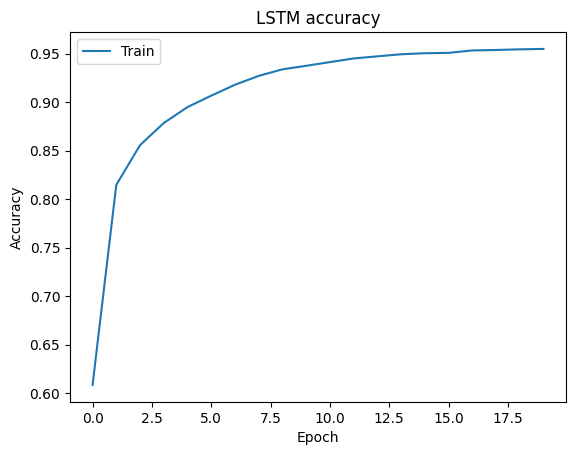

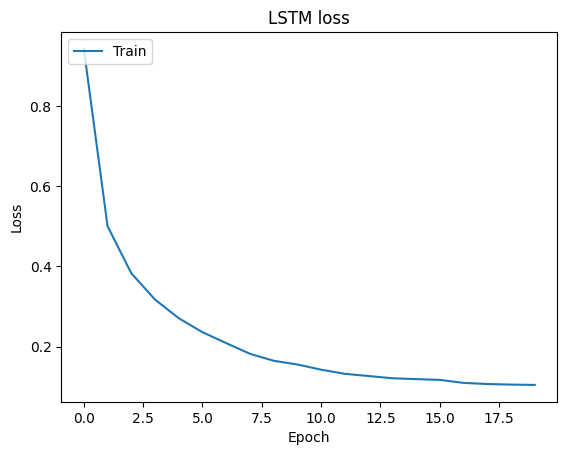

In [49]:
import matplotlib.pyplot as p

# Evaluate model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])

# Plot training & validation accuracy values
p.plot(history.history['accuracy'])
p.title('LSTM accuracy')
p.ylabel('Accuracy')
p.xlabel('Epoch')
p.legend(['Train'], loc='upper left')
p.show()

# Plot training & validation loss values
p.plot(history.history['loss'])
p.title('LSTM loss')
p.ylabel('Loss')
p.xlabel('Epoch')
p.legend(['Train'], loc='upper left')
p.show()
